In [142]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import sklearn

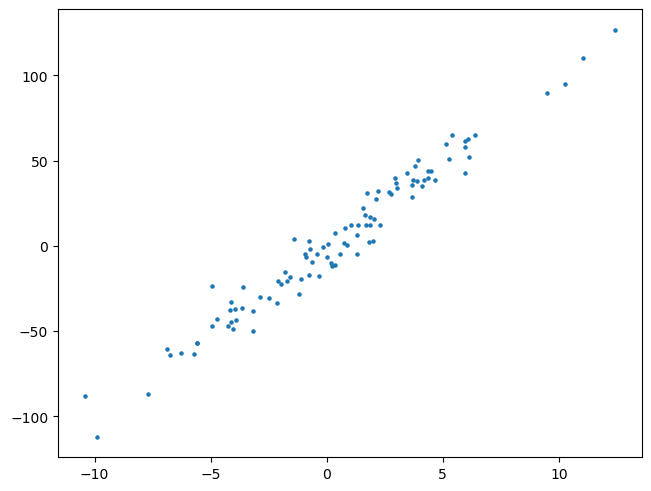

In [151]:
# 模拟数据
X = np.random.randn(100) * 5
error = np.random.randn(100) * 8
Y_obs = 10 * X + error

plt.scatter(X, Y_obs, s=5)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


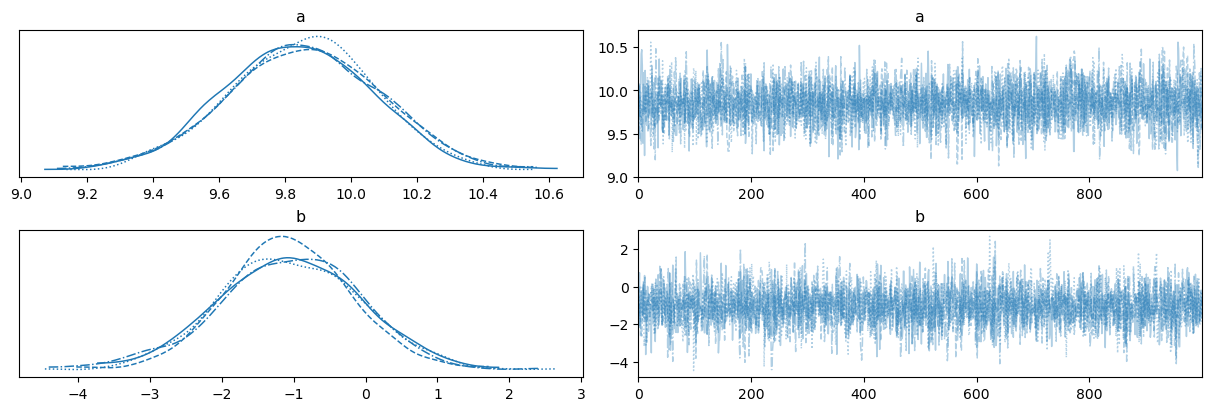

In [152]:
# Ridge regularization parameter (lambda for ridge penalty)
lambda_ridge = 0.1  # ridge regression 的 lambda, 正则化强度参数

with pm.Model() as model_ridge:
    # Priors for unknown model parameters with regularization
    # slope with ridge penalty (small sigma means regularization)
    a = pm.Normal('a', mu=0, sigma=1/np.sqrt(lambda_ridge))
    # intercept
    b = pm.Normal('b', mu=0, sigma=1/np.sqrt(lambda_ridge))

    # Expected value of outcome
    mu = a * X + b

    # Likelihood (sampling distribution) of observations
    Y = pm.Normal('Y', mu=mu, sigma=10, observed=Y_obs)

    # Sampling
    trace_ridge = pm.sample(1000, tune=1000, return_inferencedata=True)

# Plot the results
pm.plot_trace(trace_ridge)
plt.show()


In [159]:
# 计算后验平均值
a_posterior_mean = trace_ridge.posterior["a"].mean().values
b_posterior_mean = trace_ridge.posterior["b"].mean().values
Y_fit = a_posterior_mean * X + b_posterior_mean

# 计算后验标准差
a_posterior_std = trace_ridge.posterior["a"].std().values
b_posterior_std = trace_ridge.posterior["b"].std().values
Y_errorpred = a_posterior_std * X + b_posterior_std

edge1 = Y_fit + Y_errorpred
edge2 = Y_fit - Y_errorpred

for i in range(len(X)):
    if edge1[i] < edge2[i]:
        print(i)
        break

8


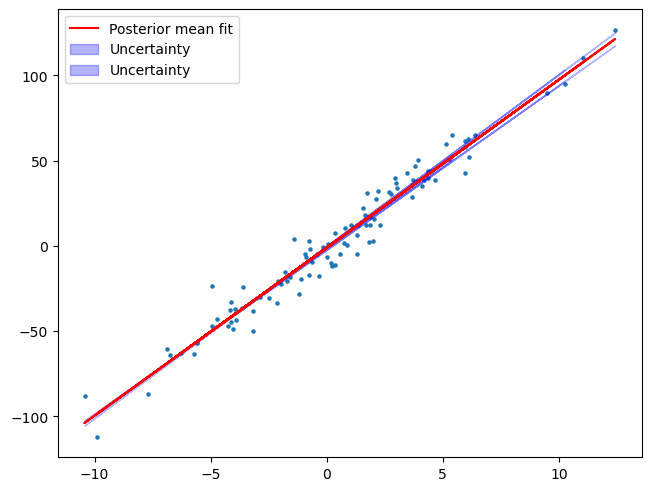

In [172]:
# 绘制填充区间
# 绘制数据点
plt.scatter(X, Y_obs, s=5)

# 绘制后验平均拟合线
plt.plot(X, Y_fit, color='red', label='Posterior mean fit')

plt.fill_between(X[:8], edge2[:8], edge1[:8], color='blue', alpha=0.3, label='Uncertainty')
plt.fill_between(X[8:], edge1[8:], edge2[8:], color='blue', alpha=0.3, label='Uncertainty')

# 显示图例
plt.legend()

# 显示图表
plt.show()

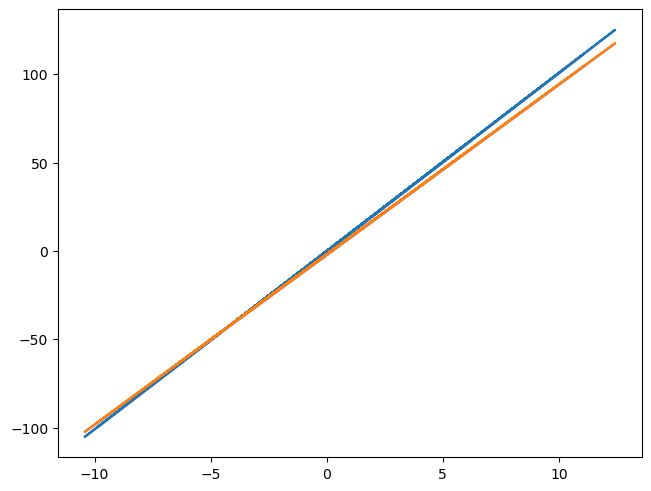

In [157]:
plt.plot(X, edge1)
plt.plot(X, edge2)
